In [4]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import tensorflow as tf


batch_size = 512
num_classes = 10
epochs = 30
#data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
def build_cnn(use_dropout, use_augmentation):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  if use_dropout:
      model.add(Dropout(0.25))

      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))

      model.add(Flatten())
      model.add(Dense(512))
      model.add(Activation('relu'))
      model.add(Dropout(0.5))

      model.add(Dense(num_classes))
      model.add(Activation('softmax'))

  else:
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))

      model.add(Flatten())
      model.add(Dense(512))
      model.add(Activation('relu'))

      model.add(Dense(num_classes))
      model.add(Activation('softmax'))

  # initiate Adam optimizer with learning rate=0.001
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
      optimizer=opt,
      metrics=['accuracy'])
  x_train_def = x_train.astype('float32')/255
  x_test_def = x_test.astype('float32')/255


  if not use_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train_def, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test_def, y_test),
                      shuffle=True)
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
      featurewise_center=False, # set input mean to 0 over the dataset
      samplewise_center=False, # set each sample mean to 0
      featurewise_std_normalization=False, # divide inputs by std of the dataset
      samplewise_std_normalization=False, # divide each input by its std
      zca_whitening=False, # apply ZCA whitening
      zca_epsilon=1e-06, # epsilon for ZCA whitening
      rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
      # randomly shift images horizontally (fraction of total width)
      width_shift_range=0.1,
      # randomly shift images vertically (fraction of total height)
      height_shift_range=0.1,
      shear_range=0., # set range for random shear
      zoom_range=0., # set range for random zoom
      channel_shift_range=0., # set range for random channel shifts
      # set mode for filling points outside the input boundaries
      fill_mode='nearest',
      cval=0., # value used for fill_mode = "constant"
      horizontal_flip=True, # randomly flip images
      vertical_flip=False, # randomly flip images
      # set rescaling factor (applied before any other transformation)
      rescale=None,
      # set function that will be applied on each input
      preprocessing_function=None,
      # image data format, either "channels_first" or "channels_last"
      data_format=None,
      # fraction of images reserved for validation (strictly between 0 and 1)
      validation_split=0.0)
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_def)

    # Fit the model on the batches generated by datagen.flow()
    history = model.fit(datagen.flow(x_train_def, y_train, batch_size=batch_size),
                        epochs=epochs, validation_data=(x_test_def, y_test), workers=4)


  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, 'keras_fashionmnist_trained_model_dropout_aug.h5')
  model.save(model_path)
  #print('Saved trained model at %s ' % model_path)

  scores = model.evaluate(x_test_def, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

  return history


In [6]:
print("Training model with dropout and with data augmentation")
history1 = build_cnn(use_dropout=True, use_augmentation=True)

print("Training model with dropout and without data augmentation")
history2 = build_cnn(use_dropout=True, use_augmentation=False)

print("Training model without dropout and with data augmentation")
history3 = build_cnn(use_dropout=False, use_augmentation=True)

print("Training model without dropout and data augmentation")
history4 = build_cnn(use_dropout=False, use_augmentation=False)


Training model with dropout and with data augmentation
Using real-time data augmentation.
Epoch 1/30
118/118 [==============================] - 27s 196ms/step - loss: 0.9501 - accuracy: 0.6449 - val_loss: 0.5581 - val_accuracy: 0.7814
Epoch 2/30
118/118 [==============================] - 26s 214ms/step - loss: 0.5915 - accuracy: 0.7747 - val_loss: 0.4697 - val_accuracy: 0.8219
Epoch 3/30
118/118 [==============================] - 26s 210ms/step - loss: 0.5077 - accuracy: 0.8078 - val_loss: 0.4102 - val_accuracy: 0.8482
Epoch 4/30
118/118 [==============================] - 25s 204ms/step - loss: 0.4618 - accuracy: 0.8266 - val_loss: 0.3527 - val_accuracy: 0.8709
Epoch 5/30
118/118 [==============================] - 25s 205ms/step - loss: 0.4269 - accuracy: 0.8406 - val_loss: 0.3268 - val_accuracy: 0.8801
Epoch 6/30
118/118 [==============================] - 24s 202ms/step - loss: 0.4005 - accuracy: 0.8504 - val_loss: 0.3178 - val_accuracy: 0.8826
Epoch 7/30
118/118 [====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 3ms/step - loss: 0.2147 - accuracy: 0.9202
Test loss: 0.2147122621536255
Test accuracy: 0.920199990272522
Training model with dropout and without data augmentation
Not using data augmentation.
Epoch 1/30
118/118 [==============================] - 7s 34ms/step - loss: 0.7224 - accuracy: 0.7325 - val_loss: 0.4376 - val_accuracy: 0.8402
Epoch 2/30
118/118 [==============================] - 4s 30ms/step - loss: 0.4263 - accuracy: 0.8429 - val_loss: 0.3638 - val_accuracy: 0.8693
Epoch 3/30
118/118 [==============================] - 4s 32ms/step - loss: 0.3621 - accuracy: 0.8667 - val_loss: 0.3338 - val_accuracy: 0.8761
Epoch 4/30
118/118 [==============================] - 4s 30ms/step - loss: 0.3250 - accuracy: 0.8792 - val_loss: 0.2943 - val_accuracy: 0.8947
Epoch 5/30
118/118 [==============================] - 4s 30ms/step - loss: 0.2962 - accuracy: 0.8901 - val_loss: 0.2778 - val_accuracy: 0.9000
Epoch 6/30
118/118 [==========================

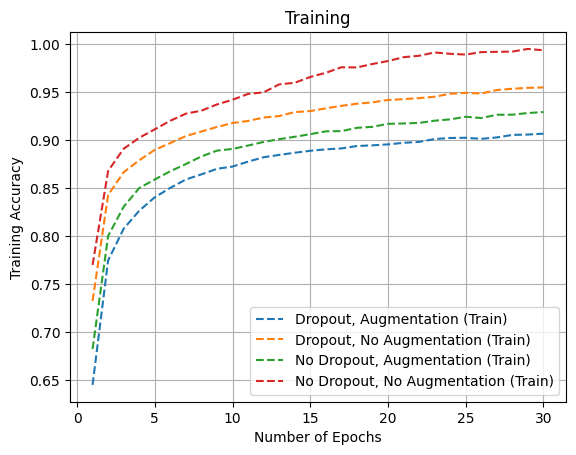

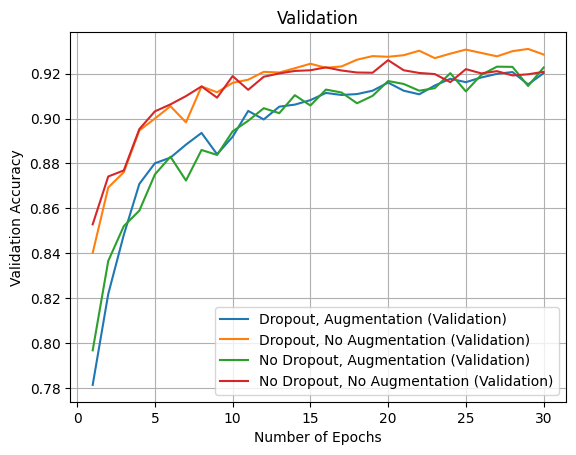

In [7]:
epochs_range = range(1, epochs + 1)
# Plot the training accuracy
plt.plot(epochs_range, history1.history['accuracy'], label='Dropout, Augmentation (Train)', linestyle='--')
plt.plot(epochs_range, history2.history['accuracy'], label='Dropout, No Augmentation (Train)', linestyle='--')
plt.plot(epochs_range, history3.history['accuracy'], label='No Dropout, Augmentation (Train)', linestyle='--')
plt.plot(epochs_range, history4.history['accuracy'], label='No Dropout, No Augmentation (Train)', linestyle='--')

plt.xlabel('Number of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training')
plt.grid(True)
plt.legend()
plt.show()

# Plot the validation accuracy
plt.plot(epochs_range, history1.history['val_accuracy'], label='Dropout, Augmentation (Validation)')
plt.plot(epochs_range, history2.history['val_accuracy'], label='Dropout, No Augmentation (Validation)')
plt.plot(epochs_range, history3.history['val_accuracy'], label='No Dropout, Augmentation (Validation)')
plt.plot(epochs_range, history4.history['val_accuracy'], label='No Dropout, No Augmentation (Validation)')

plt.xlabel('Number of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation')
plt.grid(True)
plt.legend()
plt.show()